In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Loading

Since the dataset is quite large we are going to use the drive to load the data. Also we will extract the data in tmp folder.




In [2]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/opencampus_projects/phytoplankton_labeled.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
import os
dataset_path = '/tmp/labeled_20201020'
os.listdir(dataset_path)

## Data Exploration



1.   We find the distribution of images according to the class.
2.   Find Min Max number of samples among different classes
3. Explore size and shapes of the data.



In [ ]:
def count_files_in_subdirectories(directory_path):
    result_dict = {}

    for root, dirs, files in os.walk(directory_path):
        # Iterate through subdirectories
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            # Count the number of files in each subdirectory
            file_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
            result_dict[dir_name] = file_count

    return result_dict

sample_count_dict = count_files_in_subdirectories(dataset_path)
sample_count_dict

{'Beads': 125,
 'Gonyaulax_verior': 22,
 'Chroococcus_small': 827,
 'Centrales_sp': 480,
 'Prorocentrum_cordatum': 276,
 'Gymnodinium_like': 158,
 'Thalassiosira_levanderi': 2537,
 'Pauliella_taeniata': 119,
 'Uroglenopsis_sp': 516,
 'Peridiniella_catenata_chain': 193,
 'Dinophyceae': 1433,
 'Mesodinium_rubrum': 1132,
 'Ciliata': 243,
 'Monoraphidium_contortum': 327,
 'Merismopedia_sp': 98,
 'Cryptophyceae-Teleaulax': 6830,
 'Nitzschia_paleacea': 65,
 'Skeletonema_marinoi': 4128,
 'Oocystis_sp': 842,
 'Katablepharis_remigera': 54,
 'Amylax_triacantha': 19,
 'Dolichospermum-Anabaenopsis-coiled': 2504,
 'Dinophysis_acuminata': 217,
 'Pyramimonas_sp': 1224,
 'Gymnodiniales': 69,
 'Peridiniella_catenata_single': 899,
 'Cyclotella_choctawhatcheeana': 102,
 'Chroococcales': 142,
 'Ceratoneis_closterium': 45,
 'Melosira_arctica': 43,
 'Nodularia_spumigena': 169,
 'Aphanizomenon_flosaquae': 6989,
 'Cymbomonas_tetramitiformis': 199,
 'Cryptomonadales': 713,
 'Dolichospermum-Anabaenopsis': 12280

First we will make a dataframe from the sample_count_dict. We do so to make it easy for further analysis.

In [3]:
phyto_class_info_df = pd.DataFrame(data={'categories': list(sample_count_dict.keys()), 'values': list(sample_count_dict.values())})
phyto_class_info_df.head()

NameError: ignored

Below we see the distrbution of each classes. It seems the dataset is highly imbalanced.

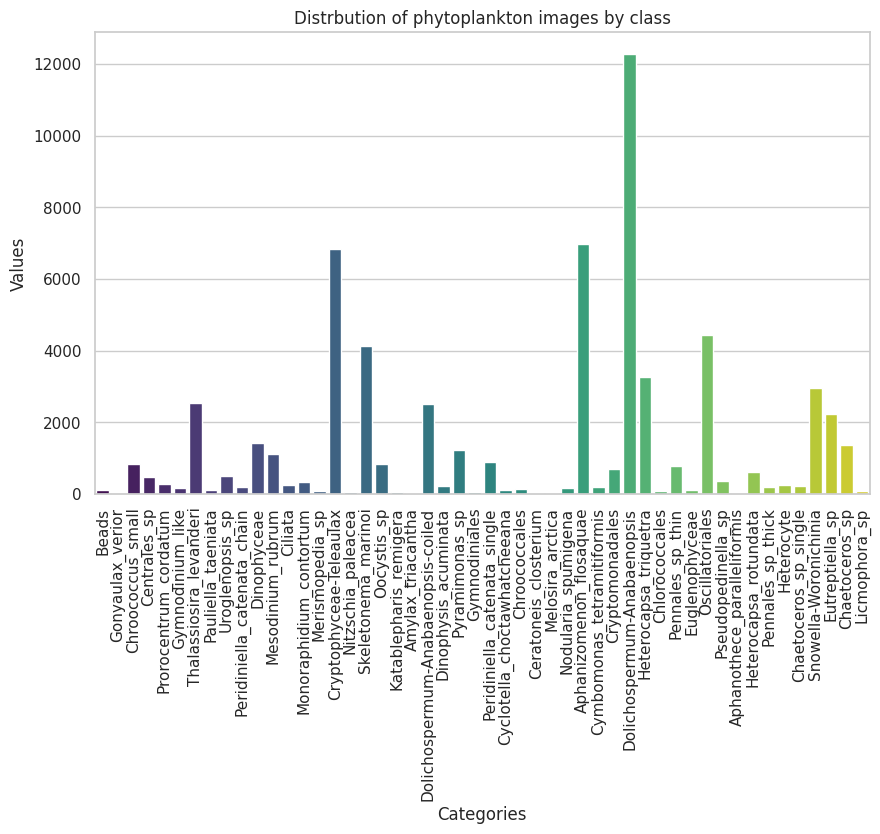

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=phyto_class_info_df,x='categories', y='values', palette="viridis")
plt.title('Distrbution of phytoplankton images by class')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=90)

plt.show()

In [ ]:
min_value = 500
max_value = 1000
filtered_df = phyto_class_info_df[(phyto_class_info_df['values'] >= min_value) & (phyto_class_info_df['values'] <= max_value)]
filtered_df

,categories,values
2,Chroococcus_small,827
8,Uroglenopsis_sp,516
18,Oocystis_sp,842
25,Peridiniella_catenata_single,899
33,Cryptomonadales,713
37,Pennales_sp_thin,781
42,Heterocapsa_rotundata,614
